In [1]:
import pandas as pd

from utils2 import *
from stat_utils import *

pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/fraud_oracle.csv')

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
time_vars = ["Month", "WeekOfMonth", "DayOfWeek", "DayOfWeekClaimed", 'MonthClaimed', 'WeekOfMonthClaimed']
vehicle_vars = ["Make", "VehiclePrice", "VehicleCategory", "AgeOfVehicle", "VehiclePrice_num"]
personal_vars = ["Sex", 'MaritalStatus', "Age", 'DriverRating', 'AgeOfPolicyHolder', 'NumberOfCars', 'PastNumberOfClaims']
policy_vars = ["PolicyType", 'Deductible', 'AgentType', "NumberOfSuppliments", "BasePolicy"]
accident_vars = ['Days_Policy_Accident', 'Days_Policy_Claim', 'PoliceReportFiled', 'WitnessPresent', 'AddressChange_Claim']

In [9]:
plot_count_plot(df, 'BasePolicy')

In [8]:
plot_two_categorical(df, 'BasePolicy', 'FraudFound_P', plot_type="stacked_barplot")

In [10]:
address_change_mapping = {
    '1 year' : "change",
    'no change' : "no_change",
    '4 to 8 years' : "change", 
    '2 to 3 years' : "change",
    'under 6 months' : "change"
}

df['AddressChange_Claim_remapped'] = df['AddressChange_Claim'].map(address_change_mapping)

In [11]:
vehicle_price_mapping = {
    'less than 20000': "less than 30000",
    '20000 to 29000': "less than 30000",
    '30000 to 39000': "30000 to 59000",
    '40000 to 59000': "30000 to 59000",
    '60000 to 69000': "more than 60000",
    'more than 69000': "more than 60000"
}

# Apply the mapping
df['VehiclePrice_remapped'] = df['VehiclePrice'].map(vehicle_price_mapping)

In [12]:
collision = df.loc[df['BasePolicy']=="Collision"]
liability = df.loc[df['BasePolicy']=="Liability"]
all_p = df.loc[df['BasePolicy']=="All Perils"]

In [42]:
plot_count_plot(collision, 'VehiclePrice_remapped')

In [31]:
collision.VehiclePrice_remapped.value_counts() / collision.VehiclePrice_remapped.value_counts().sum()

VehiclePrice_remapped
less than 30000    0.607347
30000 to 59000     0.259812
more than 60000    0.132841
Name: count, dtype: float64

In [32]:
collision.VehiclePrice_remapped.value_counts()

VehiclePrice_remapped
less than 30000    3621
30000 to 59000     1549
more than 60000     792
Name: count, dtype: int64

In [30]:
collision.VehiclePrice_remapped.value_counts().sum()

5962

In [33]:
plot_two_categorical(collision, 'FraudFound_P',  'VehiclePrice_remapped', plot_type="barplot")

In [41]:
plot_two_categorical(all_p, 'FraudFound_P',  'VehiclePrice_remapped', plot_type="stacked_barplot")

In [43]:
plot_count_plot(all_p, 'VehiclePrice_remapped')

In [49]:
plot_two_categorical(all_p, 'FraudFound_P',  'VehiclePrice_remapped', plot_type="heatmap")

In [48]:
all_p.VehiclePrice_remapped.value_counts()

VehiclePrice_remapped
less than 30000    2834
more than 60000     832
30000 to 59000      783
Name: count, dtype: int64

In [47]:
all_p.VehiclePrice_remapped.value_counts() / all_p.VehiclePrice_remapped.value_counts().sum()

VehiclePrice_remapped
less than 30000    0.636997
more than 60000    0.187008
30000 to 59000     0.175995
Name: count, dtype: float64

In [35]:
84/(708 + 84)

0.10606060606060606

In [39]:
105/(727+105)

0.12620192307692307

___

In [50]:
plot_count_plot(all_p, 'AddressChange_Claim_remapped')

In [51]:
303/(303 + 4146)

0.06810519217801753

In [61]:
plot_two_categorical(all_p,  'AddressChange_Claim_remapped', 'FraudFound_P', plot_type="stacked_barplot")

In [79]:
change = all_p.loc[all_p['AddressChange_Claim_remapped']=='change']
nochange = all_p.loc[all_p['AddressChange_Claim_remapped']=='no_change']

In [97]:
collision.groupby(['AddressChange_Claim_remapped', 'FraudFound_P']).agg({"Deductible":'mean'})

Deductible
AddressChange_Claim_remapped FraudFound_P            
change                       0             422.162162
                             1             446.938776
no_change                    0             405.371340
                             1             405.699482

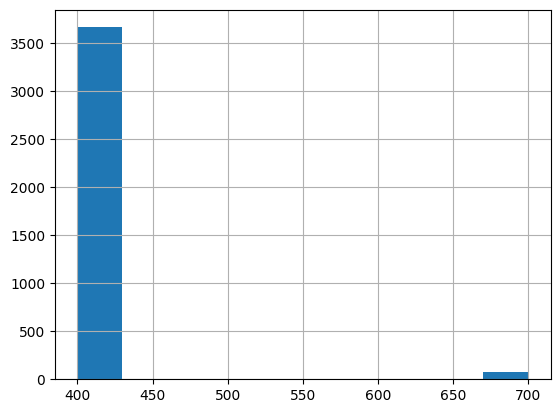

In [86]:
nochange.loc[nochange['FraudFound_P']==0, "Deductible"].hist();

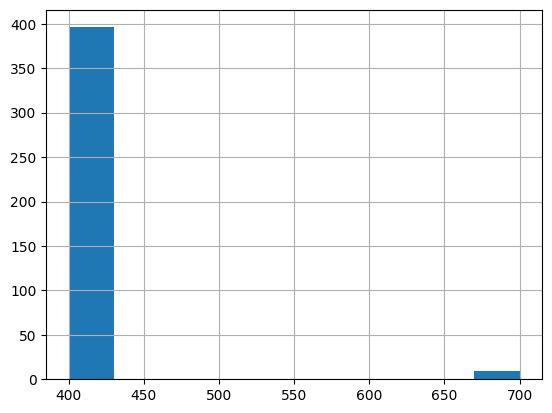

In [87]:
nochange.loc[nochange['FraudFound_P']==1, "Deductible"].hist();

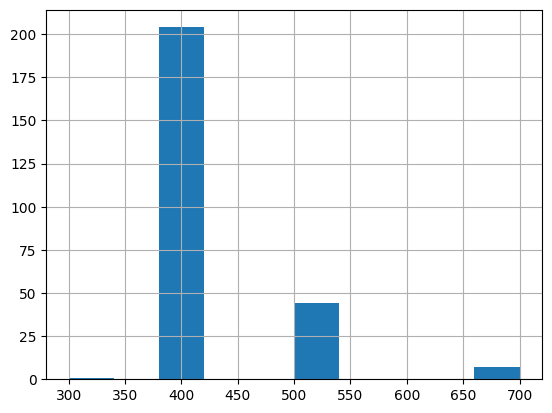

In [89]:
change.loc[change['FraudFound_P']==0, "Deductible"].hist();

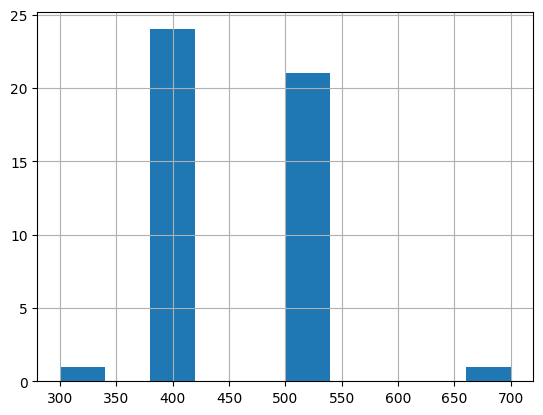

In [88]:
change.loc[change['FraudFound_P']==1, "Deductible"].hist();

In [96]:
plot_two_categorical(change, 'FraudFound_P', 'NumberOfCars', plot_type="stacked_barplot")

In [95]:
plot_two_categorical(nochange,  'NumberOfCars', 'FraudFound_P', plot_type="stacked_barplot")